## Question 1
Load the 30 Value Weighted industry portfolio returns. Limit the analysis to returns of the 30 VW portfolios from 1997 onwards (1997 included, 1996 not included, 2018 included). Also load the Market Caps of each of the 30 industries. Run a backtest of comparing a CapWeighted vs an EW portfolio over the period. Though these two weighting schemes do not need any estimation, use an estimation period of 36 months so that we can compare it in the next few questions. 
Hint: If you want to use the supplied code, import the final version of the backtester in file edhec_risk_kit_206 using:

import edhec_risk_kit_206 as erk

Remember that to load the  Value Weighted series you should use  erk.get_ind_returns(weighting="vw", ...)
and then use erk.backtest_ws(rets, estimation_window=36, weighting=...) The first month for which you have backtested returns should be 2000-01 and the last month should be 2018-12
What was the annualized return over period for the Cap Weighted Industry Portfolio?

6.52

### Question 2
Use the same data and period as the previous question.
What was the annualized volatility over the period for the Cap Weighted Industry Portfolio? 15.15

### Question 3
Use the same data and period as the previous question.
What was the annualized return over period for the Equal Weighted Industry Portfolio?  7.76

### Question 4
Use the same data and period as the previous question.
What was the annualized volatility over the period for the Equal Weighted Industry Portfolio?  15.87

In [42]:
import numpy as np
import pandas as pd

import edhec_risk_kit_206 as erk

%load_ext autoreload
%autoreload 2
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":]
ind_mcap = erk.get_ind_market_caps(30, weights=True)["1997":]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899


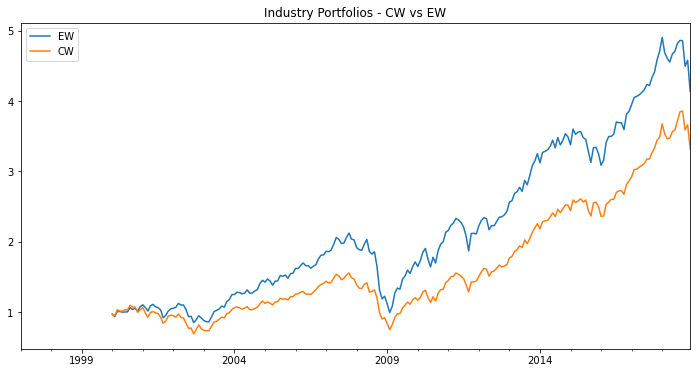

In [48]:
ewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
cwr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
erk.summary_stats(btr.dropna())

## Question 5
Now using the same data and same period, re-run the EW backtest but this time create a tethered EW portfolio by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X
What was the annualized return over the period for the tethered Equal Weighted Industry Portfolio?  7.68

## Question 6
Use the same tethered EW portfolio (by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X) as in the previous question.
What was the annualized volatility over the period for the tethered Equal Weighted Industry Portfolio?  14.08

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW-Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990


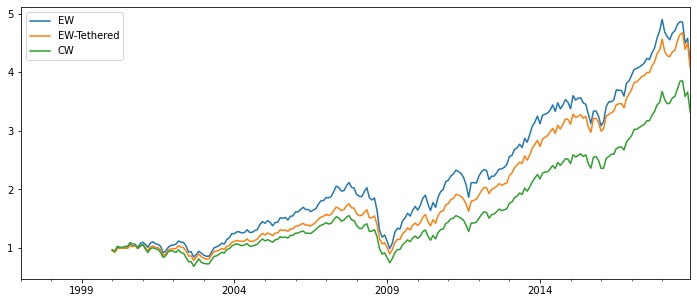

In [50]:
#ewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
ewtr = erk.backtest_ws(ind_rets, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=.01,estimation_window=36, weighting=erk.weight_ew)
#cwr = erk.backtest_ws(ind_rets, weighting=erk.weight_cw, cap_weights=ind_mcap)
EWTE = pd.DataFrame({"EW": ewr, "EW-Tethered": ewtr, "CW": cwr})
(1+EWTE).cumprod().plot(figsize=(12,5))
erk.summary_stats(EWTE.dropna())
#ewtr = backtest_ws(ind_rets, estimation_window=36, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=0.01)
#tether = pd.DataFrame({"EW-Tethered": ewtr})
#(1+tether).cumprod().plot(figsize=(12,5))
#erk.summary_stats(tether.dropna())

## Question 7
What was Tracking Error between the Pure EW (without any tethering) portfolio and the CW portfolio? 18.75

## Question 8
What was Tracking Error between the Tethered EW portfolio and the CW portfolio? 11.67

In [52]:
erk.tracking_error(ewr, cwr),erk.tracking_error(ewtr, cwr)

(0.18752094143646486, 0.11671015519949166)

## Question 9
Run a backtest for the same period (1997 onwards i.e. 1997 included, 1996 not included, 2018 included), using an estimation window of 36 months as above, to build the Global Minimum Variance Portfolio by estimating the Covariance matrix using Sample Covariance. (This might take a minute or so to run depending on your computer power!) 
What was the annualized return over the period for the GMV Portfolio?  6.63

## Question 10
Use the same GMV portfolio as the previous question. What was the annualized volatility over the period for the GMV Portfolio?  11.74

In [22]:
def sample_cov(r, **kwargs):
    """
    Returns the sample covariance of the supplied returns
    """
    return r.cov()

def weight_gmv(r, cov_estimator=sample_cov, **kwargs):
    """
    Produces the weights of the GMV portfolio given a covariance matrix of the returns 
    """
    est_cov = cov_estimator(r, **kwargs)
    return erk.gmv(est_cov)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990
GMV-Sample,0.066306,0.117410,-0.741089,4.469212,0.055456,0.080583,0.300815,-0.421289


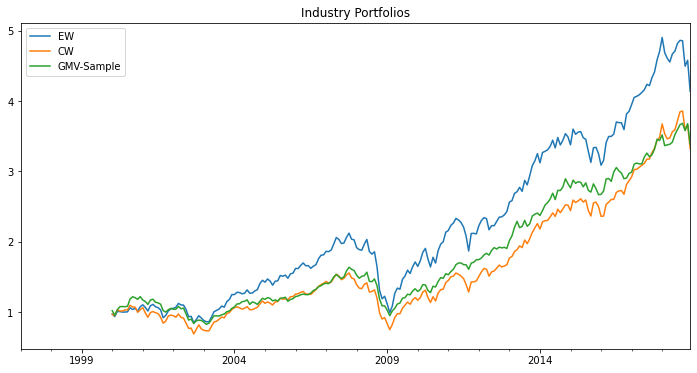

In [23]:
mv_s_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=sample_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

## Question 11
Run a backtest for the same period as the previous question, and again using an estimation window of 36 months as above, to build the Global Minimum Variance Portfolio but this time, estimating the Covariance matrix using Shrinkage between the Constant Correlation and Sample Covariance estimates using a delta of 0.25. (This might take a minute or so to run depending on your computer power!)
What was the annualized return over the period for this new Shrinkage-GMV Portfolio?  6.85

## Question 12
Using the same Shrinkage-GMV portfolio return series you used in the previous question, what was the annualized volatility over the period for the Shrinkage-GMV Portfolio?  11.46

In [25]:
def cc_cov(r, **kwargs):
    """
    Estimates a covariance matrix by using the Elton/Gruber Constant Correlation model
    """
    rhos = r.corr()
    n = rhos.shape[0]
    # this is a symmetric matrix with diagonals all 1 - so the mean correlation is ...
    rho_bar = (rhos.values.sum()-n)/(n*(n-1))
    ccor = np.full_like(rhos, rho_bar)
    np.fill_diagonal(ccor, 1.)
    sd = r.std()
    ccov = ccor * np.outer(sd, sd)
#     mh.corr2cov(ccor, sd)
    return pd.DataFrame(ccov, index=r.columns, columns=r.columns)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV-Sample,0.066306,0.11741,-0.741089,4.469212,0.055456,0.080583,0.300815,-0.421289
GMV-CC,0.074340,0.11139,-0.723723,4.153164,0.051800,0.074172,0.387294,-0.340634


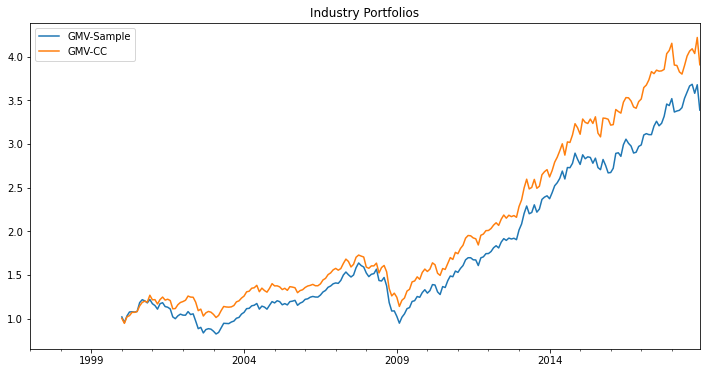

In [26]:
mv_cc_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=cc_cov)
btr = pd.DataFrame({"GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

In [27]:
def shrinkage_cov(r, delta=0.5, **kwargs):
    """
    Covariance estimator that shrinks between the Sample Covariance and the Constant Correlation Estimators
    """
    prior = cc_cov(r, **kwargs)
    sample = sample_cov(r, **kwargs)
    return delta*prior + (1-delta)*sample

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV-Sample,0.066306,0.117410,-0.741089,4.469212,0.055456,0.080583,0.300815,-0.421289
GMV-CC,0.074340,0.111390,-0.723723,4.153164,0.051800,0.074172,0.387294,-0.340634
GMV-Shrink 0.25,0.068467,0.114572,-0.731294,4.264951,0.053884,0.077715,0.326636,-0.393410


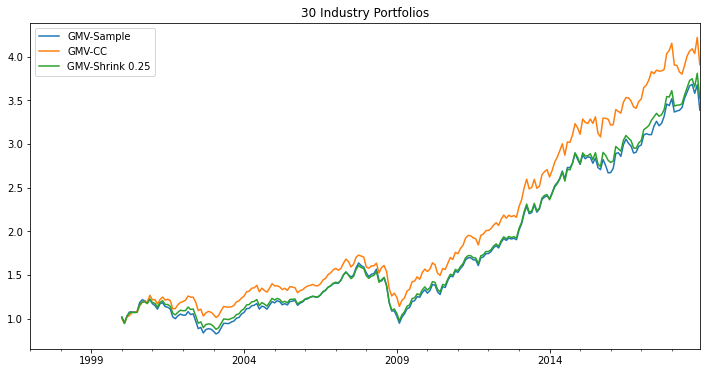

In [28]:
mv_sh_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=shrinkage_cov, delta=0.25)
btr = pd.DataFrame({"GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.25': mv_sh_r})
(1+btr).cumprod().plot(figsize=(12,6), title="30 Industry Portfolios")
erk.summary_stats(btr.dropna())